In [23]:
import numpy as np
np.random.seed(10)

In [24]:
from keras.utils import np_utils

In [25]:
from keras.datasets import mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [28]:
x_train_4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [29]:
print(x_train_4D.shape)
print(x_test_4D.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
x_train_4D_normalized = x_train_4D / 255
x_test_4D_normalized = x_test_4D / 255

In [31]:
print(y_train[0:5])
print(y_test[0:5])

[5 0 4 1 9]
[7 2 1 0 4]


In [32]:
y_train_oneHotEncoding = np_utils.to_categorical(y_train)
y_test_oneHotEncoding = np_utils.to_categorical(y_test)

In [33]:
print(y_train_oneHotEncoding[0:5])
print(y_test_oneHotEncoding[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [35]:
model = Sequential()

In [36]:
model.add( Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu') )

In [37]:
model.add( MaxPooling2D( pool_size=(2,2) ) )

In [38]:
model.add( Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu' ) )

In [39]:
model.add( MaxPooling2D( pool_size=(2,2) ) )

In [40]:
model.add( Dropout(0.25) )

In [41]:
print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
Total params: 14,852
Trainable params: 14,852
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
model.add( Flatten() )

In [43]:
model.add( Dense(128, activation='relu') )

In [44]:
model.add( Dense(10, activation='softmax') )

In [45]:
print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [46]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
train_history = model.fit( x = x_train_4D_normalized, 
                           y = y_train_oneHotEncoding, 
                          validation_split = 0.2, 
                          epochs = 10, batch_size = 500, 
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.0045 - acc: 0.9984 - val_loss: 0.0342 - val_acc: 0.9920
Epoch 2/10
 - 2s - loss: 0.0046 - acc: 0.9982 - val_loss: 0.0364 - val_acc: 0.9920
Epoch 3/10
 - 2s - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0332 - val_acc: 0.9930
Epoch 4/10
 - 2s - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0332 - val_acc: 0.9927
Epoch 5/10
 - 2s - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0367 - val_acc: 0.9920
Epoch 6/10
 - 2s - loss: 0.0039 - acc: 0.9986 - val_loss: 0.0322 - val_acc: 0.9929
Epoch 7/10
 - 2s - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0338 - val_acc: 0.9928
Epoch 8/10
 - 2s - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0399 - val_acc: 0.9917
Epoch 9/10
 - 2s - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0320 - val_acc: 0.9935
Epoch 10/10
 - 2s - loss: 0.0026 - acc: 0.9990 - val_loss: 0.0351 - val_acc: 0.9922


In [51]:
import matplotlib.pyplot as pyplot
def my_show_train_history(input_train_history, input_train, input_validation):
    pyplot.plot(input_train_history.history[input_train] )
    pyplot.plot(input_train_history.history[input_validation])
    pyplot.title('Train History')
    pyplot.ylabel(input_train)
    # pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.legend(['my_train','my_validation'], loc='upper left')
    pyplot.show()

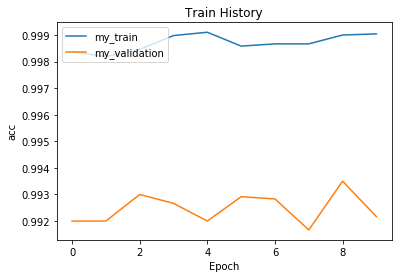

In [53]:
my_show_train_history( train_history, 'acc', 'val_acc' )

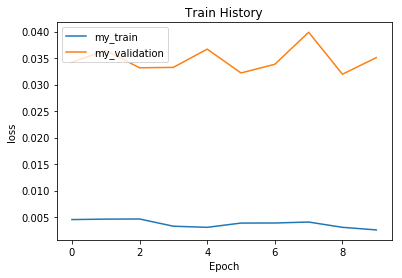

In [60]:
my_show_train_history( train_history, 'loss', 'val_loss' )

In [61]:
scores = model.evaluate( x_test_4D_normalized, y_test_oneHotEncoding)
scores[1]

10000/10000 [==============================] - 1s 75us/step


0.9927

In [62]:
prediction = model.predict_classes(x_test_4D_normalized)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [63]:
import matplotlib.pyplot as pyplot
def my_plot_images_labels_prediction(input_images, input_labels, input_prediction, input_index, input_num=10):
    fig = pyplot.gcf()
    fig.set_size_inches(12,14)
    if input_num>10:
        input_num=10
    for i in range(0, input_num):
        ax = pyplot.subplot(5,5,1+i)
        ax.imshow(input_images[input_index], cmap='binary')
        title = "label=" + str(input_labels[input_index])
        if len(input_prediction)>0:
            title= title + ", predict=" + str(input_prediction[input_index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        input_index = input_index + 1
    pyplot.show()

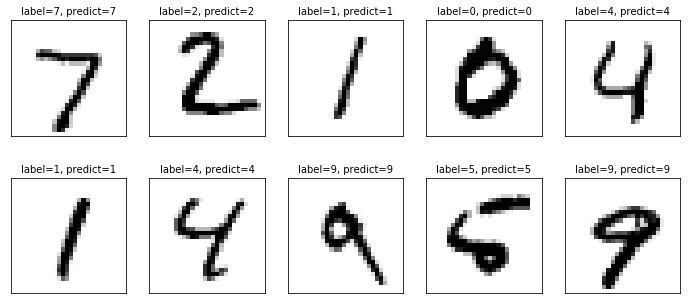

In [68]:
my_plot_images_labels_prediction(x_test, y_test, prediction, input_index=0)

In [69]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,1,0,0,1,0,0,0
1,0,1131,1,1,0,0,1,0,1,0
2,0,0,1023,0,0,0,0,8,1,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,973,0,1,0,1,7
5,1,0,0,5,0,884,2,0,0,0
6,3,2,1,0,1,1,948,0,2,0
7,0,0,5,0,0,0,0,1017,1,5
8,1,0,1,4,0,1,0,0,965,2
